## КМ-4
1. Средствами SymPy вычислите сумму ряда $f(a, n) = \sum\limits_{i=1}^n\frac{1}{(i+a^2)}$ постройте зависимость f(2, n).
2. На занятиях рассматривался набор данных по НЛО. Он был разослан. Необходимо электронную таблицу Excel преобразовать в DataFrame. Проанализируйте, в каких странах проводились наблюдения НЛО. Постройтераспределение НЛО по странам. Постройте распределение наблюдений по странам в XX веке и XXI веках. Постройте распределение по годам для в XXI веке для США.

## Задание 1

In [56]:
from sympy import summation, SeqFormula, init_printing
from sympy.abc import i
import matplotlib.pyplot as plt
init_printing()


def f(a, n):
    s = SeqFormula(1/(i+a**2), (i, 1, n))
    return s, summation(s.formula, (i, s.start, s.stop))


f(2, 4)

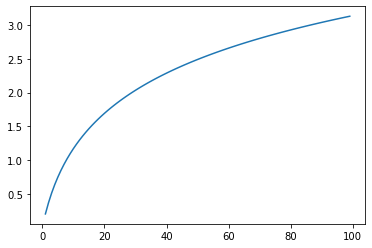

In [57]:
n = range(1, 100)
plt.plot(n, [f(2, nn)[1] for nn in n])
plt.show()

## Задание 2

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('ufo.csv')
df

/srv/conda/envs/notebook/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,#,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,dt,seconds,logseconds
0,0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10/10/1949 20:30,2700.0,3.431364
1,1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10/10/1949 21:00,7200.0,3.857332
2,2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10/10/1955 17:00,20.0,1.301030
3,3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10/10/1956 21:00,20.0,1.301030
4,4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10/10/1960 20:00,900.0,2.954243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444,9/9/2013 21:15,600.0,2.778151
80328,80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500,9/9/2013 22:00,1200.0,3.079181
80329,80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444,9/9/2013 22:00,1200.0,3.079181
80330,80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556,9/9/2013 22:20,5.0,0.698970


### Распределение НЛО по странам

<AxesSubplot:>

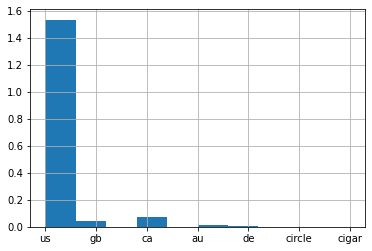

In [59]:
df['country'].hist(density=True)

### Распределение НЛО по странам в ХХ и ХХI веках

<AxesSubplot:>

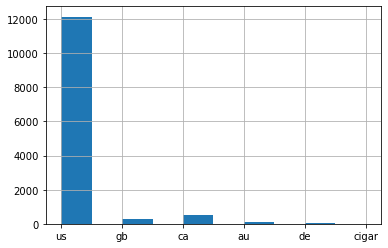

In [60]:
from datetime import datetime

def get_year(dateString):
    dateFormatter = '%m/%d/%Y %H:%M'
    try:
        dt = datetime.strptime(dateString, dateFormatter)
    except TypeError:
        return None
    return dt.year

df['year'] = df['dt'].apply(get_year)
new_df1 = df.loc[(df['year'] >= 1900) & (df['year'] < 2000)]
new_df2 = df.loc[(df['year'] >= 2000) & (df['year'] < 2100)]
new_df1['country'].hist() #20 век

<AxesSubplot:>

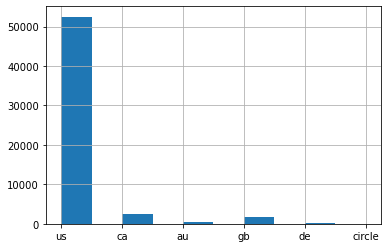

In [61]:
new_df2['country'].hist() #21 век

### Распределение по годам для в XXI веке для США

<AxesSubplot:>

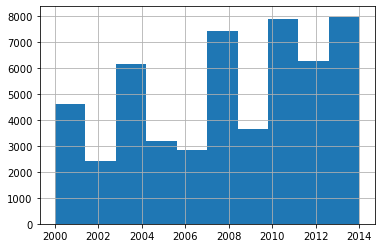

In [62]:
new_df3 = new_df2.loc[df['country'] == 'us']
new_df3['year'].hist()